# AE 598RL Homework 4

In [1]:
import gym
import gym_gridworld
import numpy as np
import matplotlib.pyplot as plt
from tablemethodsrl import Sarsa
from tablemethodsrl import QLearning
from tablemethodsrl import Reinforce
%matplotlib inline

Create environments and agents.

In [2]:
ezpz = gym.make('GridWorld-v0')
hard = gym.make('GridWorldHard-v0')

In [3]:
# parameters
episodes_num = [5000, 5000, 2500, 1000, 1000]
episode_length = 100
batch_size = [100, 50, 100, 100, 50]
learning_rate = [.01, .001, .01, .01, .001]
reward_decay = 1
eps = .9

In [4]:
# ez reinforce agents
reinforce_ez1 = Reinforce(ezpz, learning_rate[0], reward_decay, eps)
reinforce_ez2 = Reinforce(ezpz, learning_rate[1], reward_decay, eps)
reinforce_ez3 = Reinforce(ezpz, learning_rate[2], reward_decay, eps)
reinforce_ez4 = Reinforce(ezpz, learning_rate[3], reward_decay, eps)
reinforce_ez5 = Reinforce(ezpz, learning_rate[4], reward_decay, eps)

# hard reinforce agents
reinforce_hd1 = Reinforce(hard, learning_rate[0], reward_decay, eps)
reinforce_hd2 = Reinforce(hard, learning_rate[1], reward_decay, eps)
reinforce_hd3 = Reinforce(hard, learning_rate[2], reward_decay, eps)
reinforce_hd4 = Reinforce(hard, learning_rate[3], reward_decay, eps)
reinforce_hd5 = Reinforce(hard, learning_rate[4], reward_decay, eps)

Train the agents

In [11]:
eps1, rewards1, policy1 = reinforce_ez1.train(episodes_num[0], batch_size[0], episode_length)
eps2, rewards2, policy2 = reinforce_ez2.train(episodes_num[1], batch_size[1], episode_length)
eps3, rewards3, policy3 = reinforce_ez3.train(episodes_num[2], batch_size[2], episode_length)
eps4, rewards4, policy4 = reinforce_ez4.train(episodes_num[3], batch_size[3], episode_length)
eps5, rewards5, policy5 = reinforce_ez5.train(episodes_num[4], batch_size[4], episode_length)

Plot the results

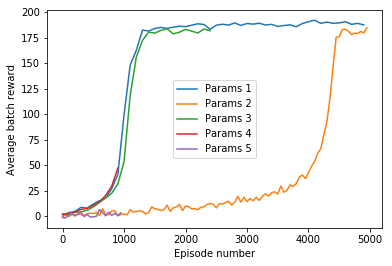

In [12]:
plt.plot(eps1, rewards1, label='Params 1')
plt.plot(eps2, rewards2, label='Params 2')
plt.plot(eps3, rewards3, label='Params 3')
plt.plot(eps4, rewards4, label='Params 4')
plt.plot(eps5, rewards5, label='Params 5')
plt.xlabel('Episode number')
plt.ylabel('Average batch reward')
plt.legend()
plt.show()

We'll use the parameters in 1 to train SARSA and Q-learning agents for comparison.

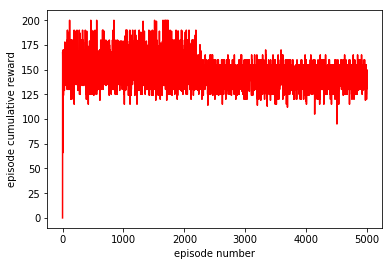

In [18]:
# SARSA
sarsa = Sarsa(ezpz, .01, 1, .1)

episodes_num = 5000
episode_length = 100
sarsa_cum_rewards = np.array(0)
for episode in range(episodes_num):
    # initialize each episode
    s = ezpz.reset()
    a = sarsa.choose_action(s)

    episode_cum_reward = sarsa.train(s, a, episode_length, False)

    sarsa_cum_rewards = np.append(sarsa_cum_rewards, episode_cum_reward)

sarsa_cum_rewards = sarsa_cum_rewards[0:-1]
plt.plot(range(episodes_num), sarsa_cum_rewards, 'r')
plt.ylabel('episode cumulative reward')
plt.xlabel('episode number')
plt.show()

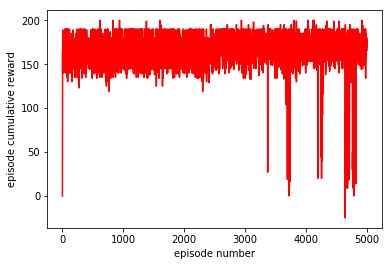

In [19]:
# Q Learning
qlearn = QLearning(ezpz, .01, 1, .1)

episodes_num = 5000
episode_length = 100
ql_cum_rewards = np.array(0)
for episode in range(episodes_num):
    # initialize each episode
    s = ezpz.reset()

    episode_cum_reward = qlearn.train(s, episode_length, False)

    ql_cum_rewards = np.append(ql_cum_rewards, episode_cum_reward)

ql_cum_rewards = ql_cum_rewards[0:-1]
plt.plot(range(episodes_num), ql_cum_rewards, 'r')
plt.ylabel('episode cumulative reward')
plt.xlabel('episode number')
plt.show()

Compare the three tabular methods' performance on easy GridWorld

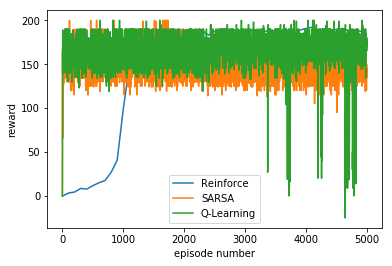

In [21]:
plt.plot(eps1, rewards1, label='Reinforce')
plt.plot(range(episodes_num), sarsa_cum_rewards, label='SARSA')
plt.plot(range(episodes_num), ql_cum_rewards, label='Q-Learning')
plt.ylabel('reward')
plt.xlabel('episode number')
plt.legend()
plt.show()

Since it's hard to see Reinforce data, I need to implements average rewards for SARSA and Q-Learning as well. This will also be fairer comparison.